# Proyek Machine learning-Andry Septian Syahputra Tumaruk-MC476D5Y0692-MC39

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Pada kode diatas ini kita akan mengimport library yang dibutuhkan untuk menjalankan proyek ini

In [2]:
df=pd.read_csv('alzheimers_disease_data.csv')

Kode ini digunakan untuk mengimpor dan menampilkan data dari file CSV ke dalam Python menggunakan Pandas. Ini adalah langkah awal dalam proses project ini.

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


kode diatas untuk melihat 5 data paling atas dari dataset

# Explorasi Data Analysisi(EDA)

## Deskripsi variabel

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

- Semua kolom memiliki jumlah data lengkap (non-null), artinya tidak ada missing value yang perlu ditangani saat ini.
- Tipe data didominasi oleh float64, kecuali DoctorInCharge yang bertipe integer dan Float.
- Memori yang digunakan cukup ringan, sekitar 587 KB.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


- Dataset ini memang fokus pada lansia (kelompok usia risiko Alzheimer). Mayoritas pasien berada antara 60 dan 90 tahun.
- Jumlah pria dan wanita cukup seimbang, sedikit lebih banyak laki-laki.
- Mayoritas pasien memiliki tingkat pendidikan menengah ke atas.
- Rata-rata pasien berada pada kategori overweight menurut standar WHO (BMI > 25).
- Sebagian besar pasien bukan perokok, namun konsumsi alkohol lumayan tersebar.
- Kualitas tidur cenderung baik, tapi aktivitas fisik dan diet perlu ditingkatkan.
- Ada sekelompok pasien dengan penyakit penyerta, yang bisa memperburuk fungsi kognitif.
- Banyak pasien dengan penurunan fungsi kognitif sedang hingga berat.
- Pasien menunjukkan tingkat kemandirian yang menurun.
- Sekitar 33% pasien didiagnosis Alzheimer, sisanya tidak.

In [6]:
df.drop(['PatientID','DoctorInCharge'],inplace=True,axis=1)

kode diatas untuk menghapus colom yang tidak ada kaitannya dengan prediksi yang akan kita lakukan

## Menangani missing value

In [7]:
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


## Menangani data duplikasi

In [8]:
print("jumlah data yang terduplikasi:",df.duplicated().sum())

jumlah data yang terduplikasi: 0


kode diatas mengecek duplikasi data yang sedang terjadi

## Univariate analysis

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


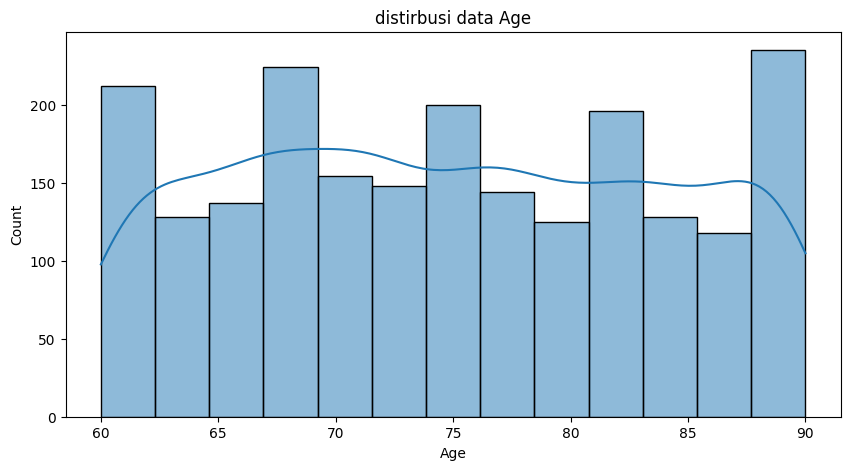

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


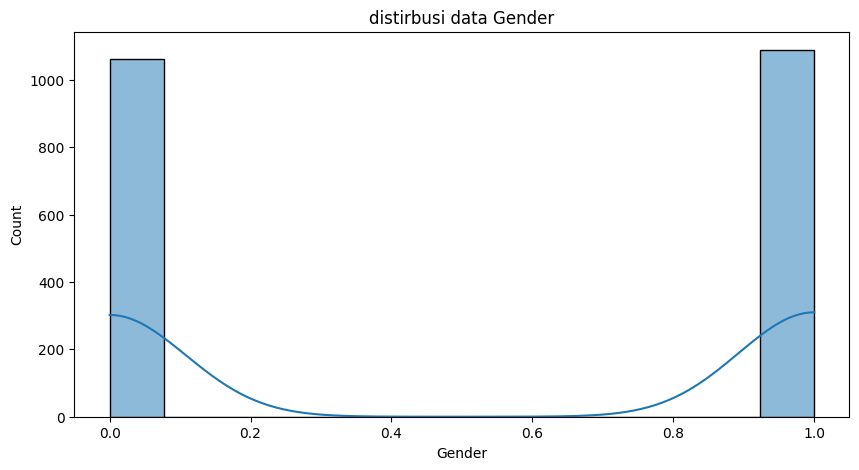

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


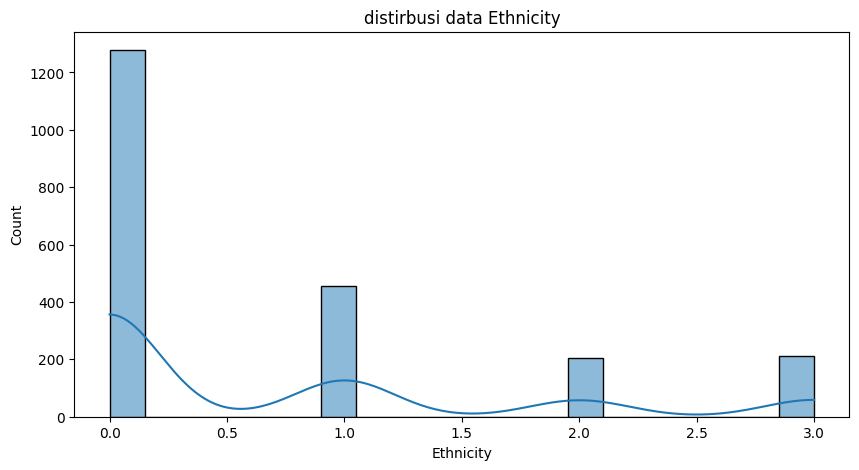

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


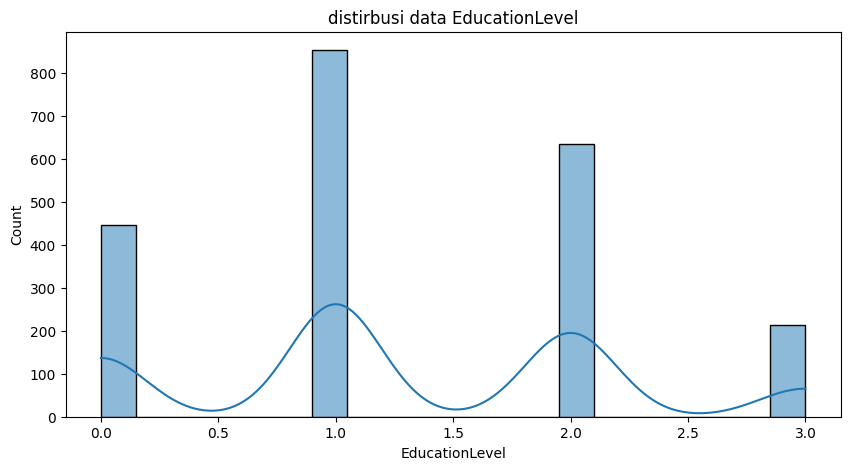

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


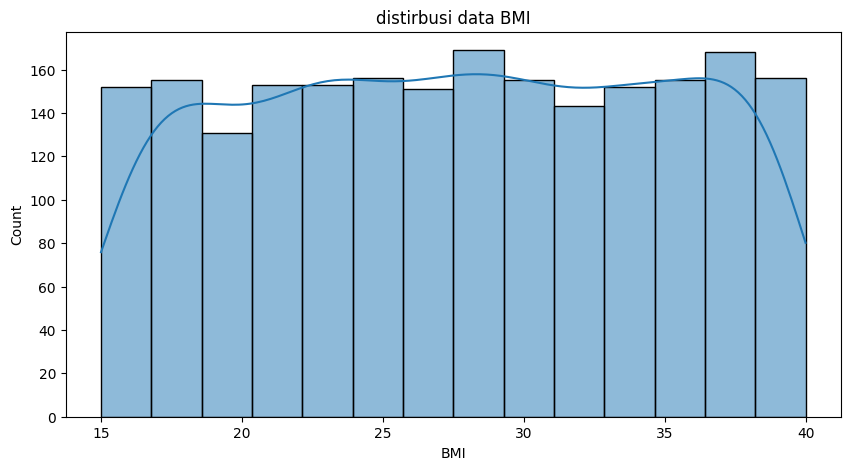

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


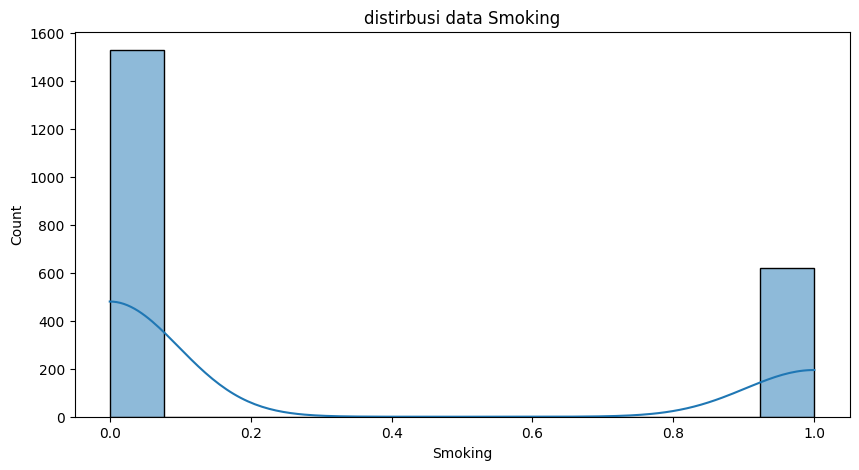

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


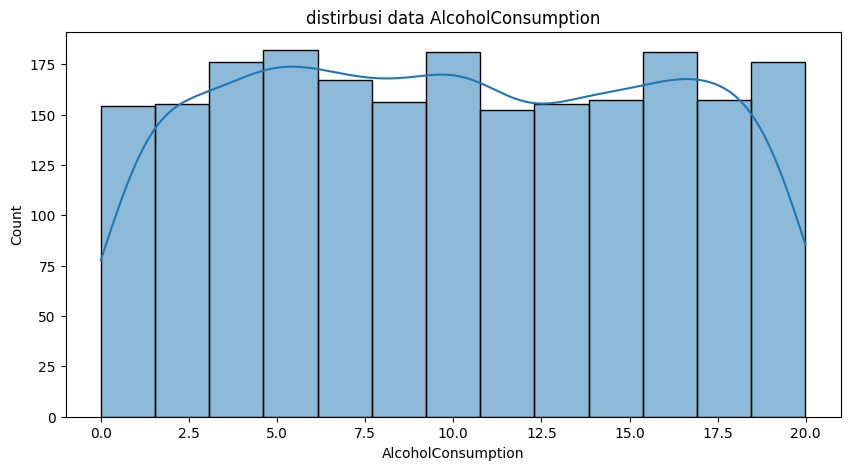

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


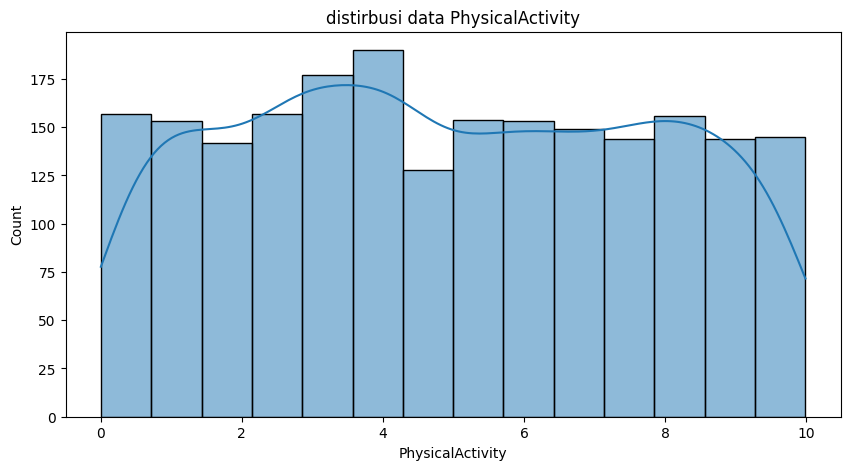

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


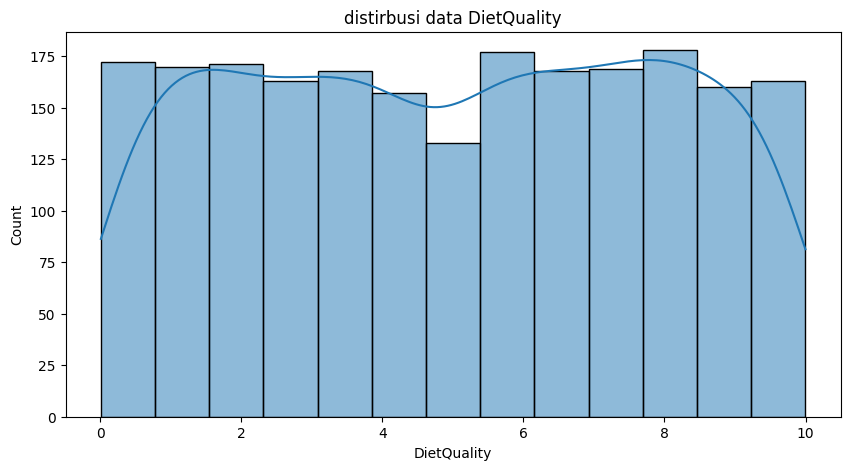

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


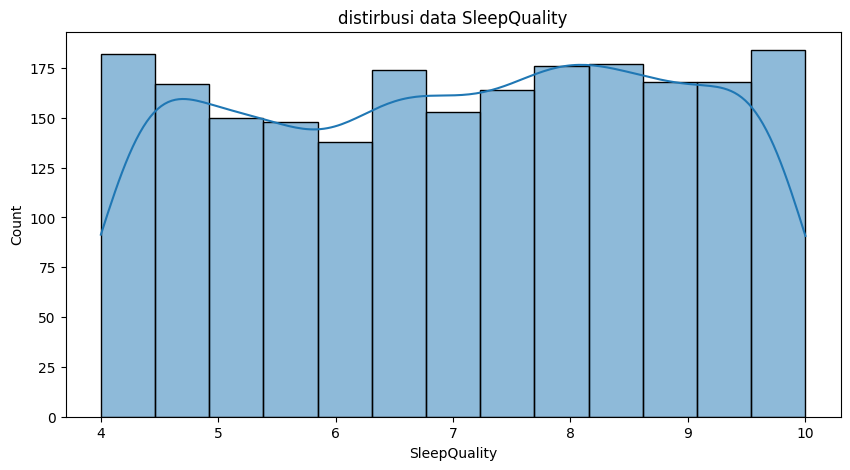

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


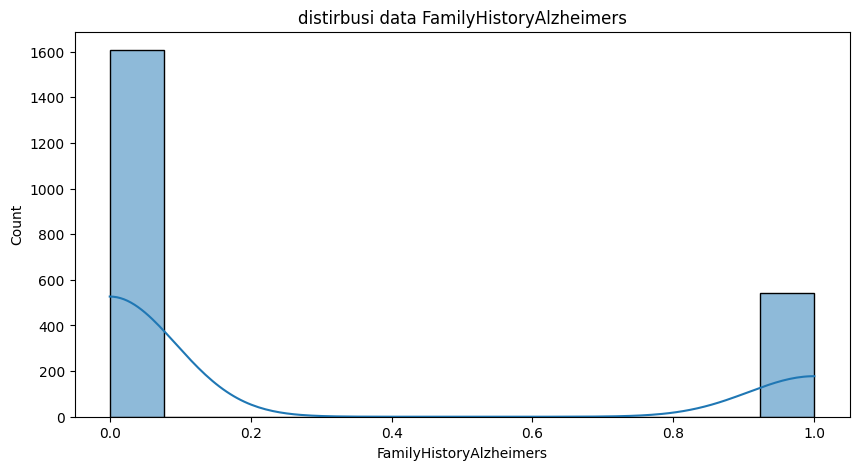

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


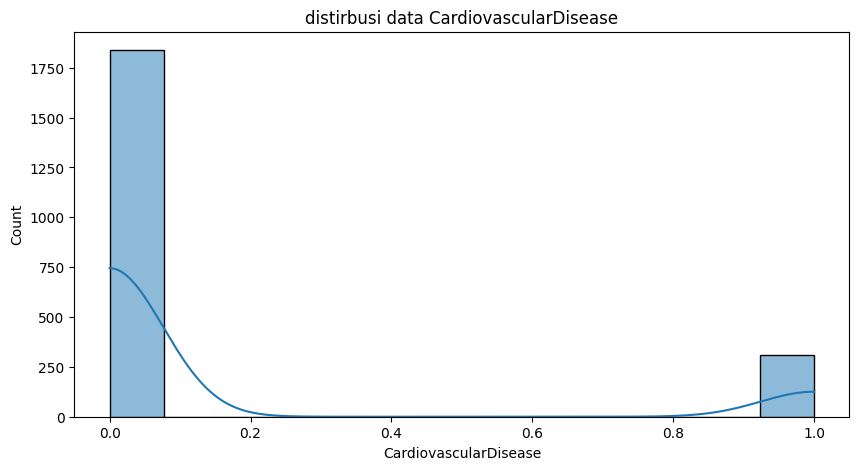

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


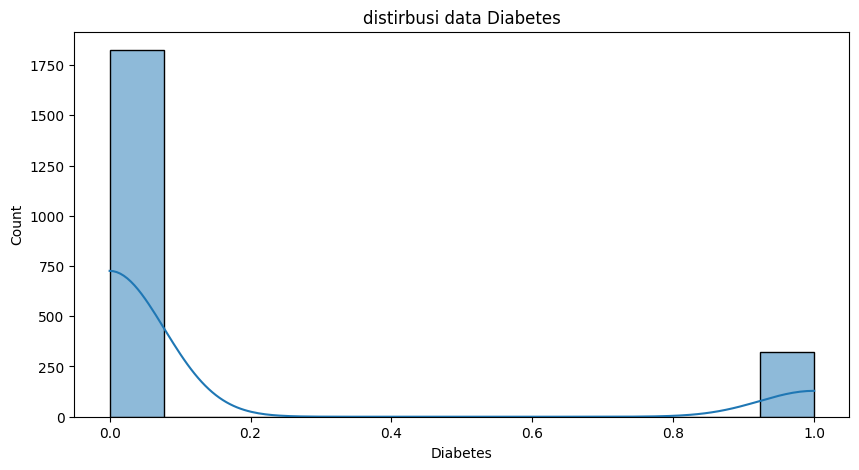

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


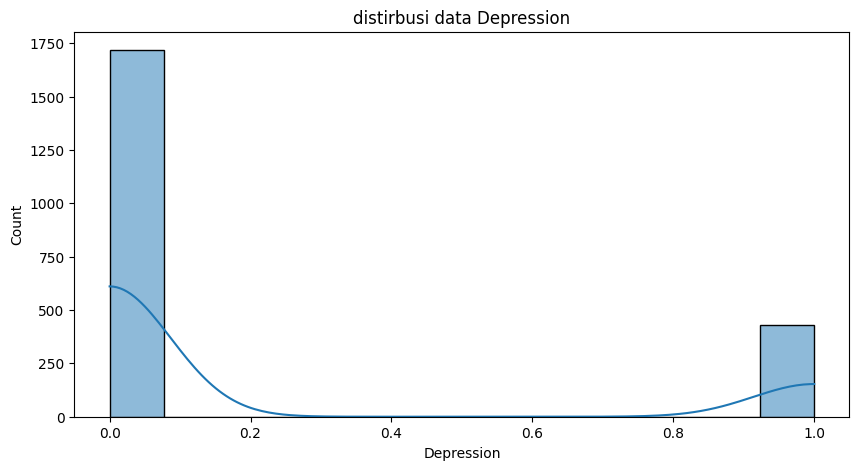

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


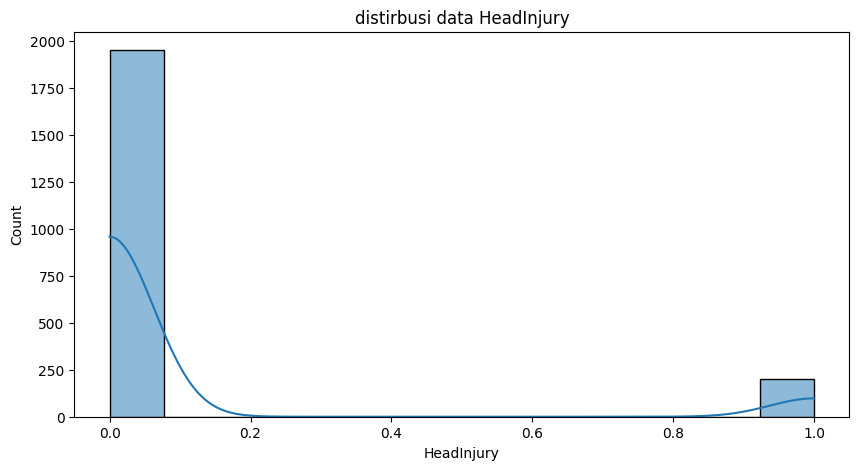

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


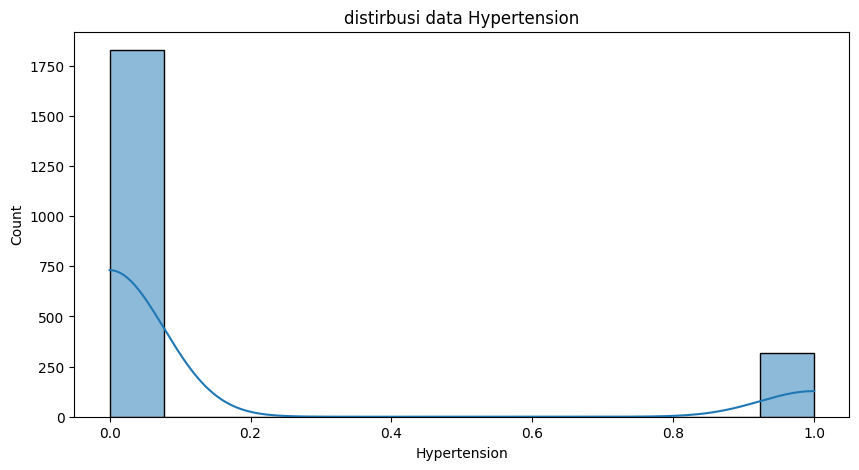

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


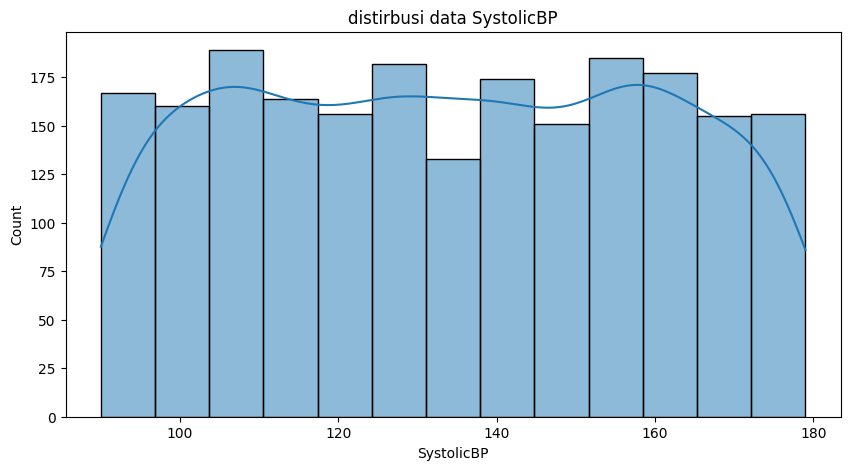

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


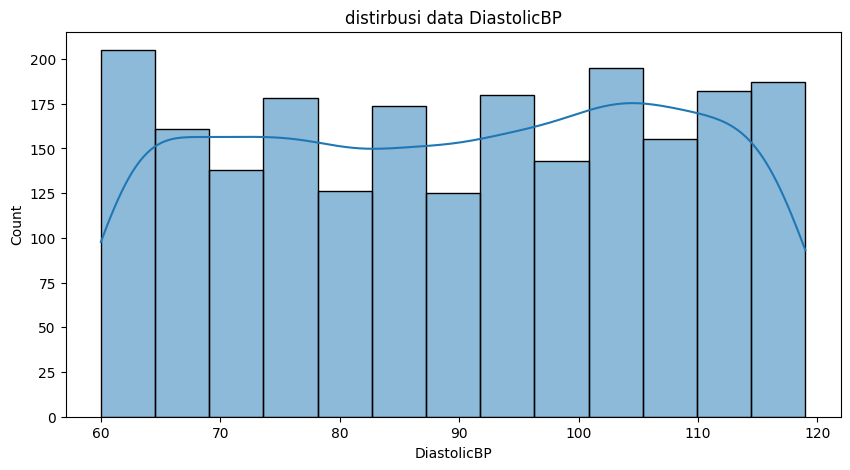

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


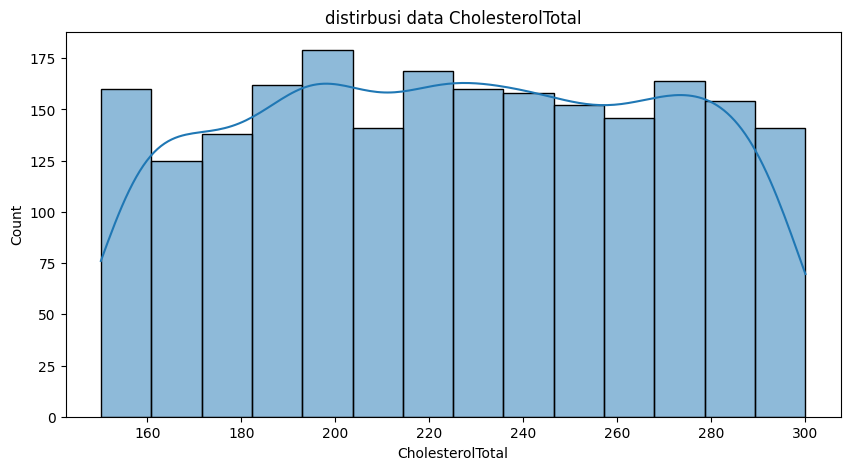

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


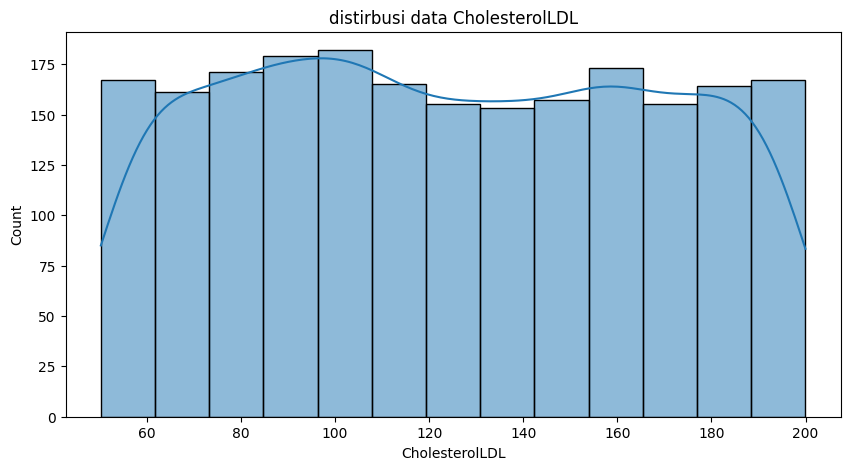

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


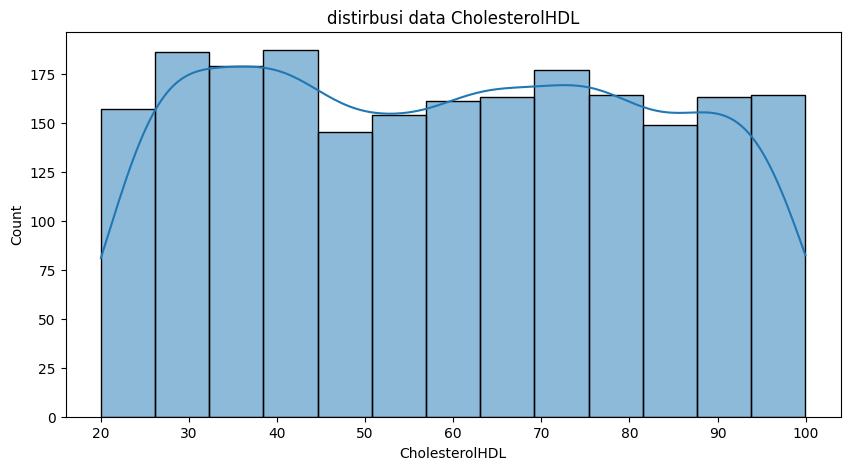

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


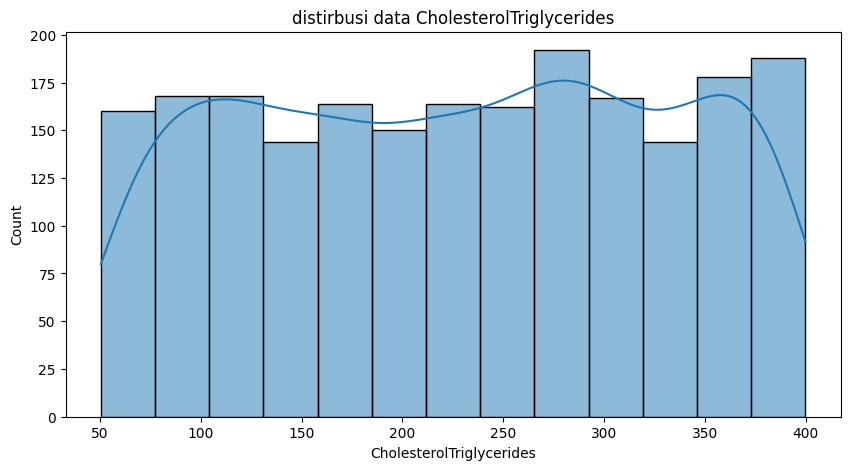

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


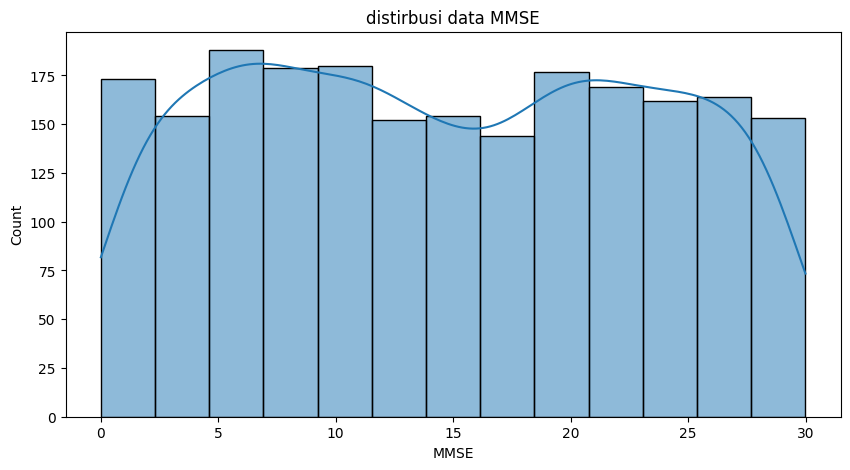

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


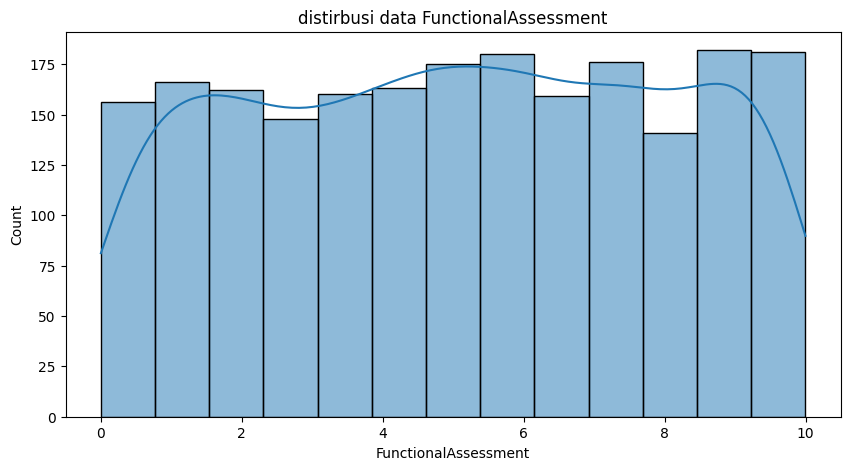

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


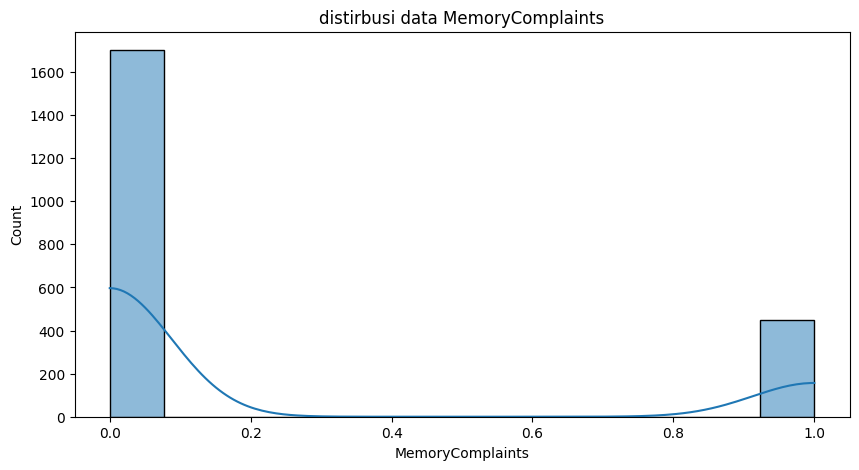

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


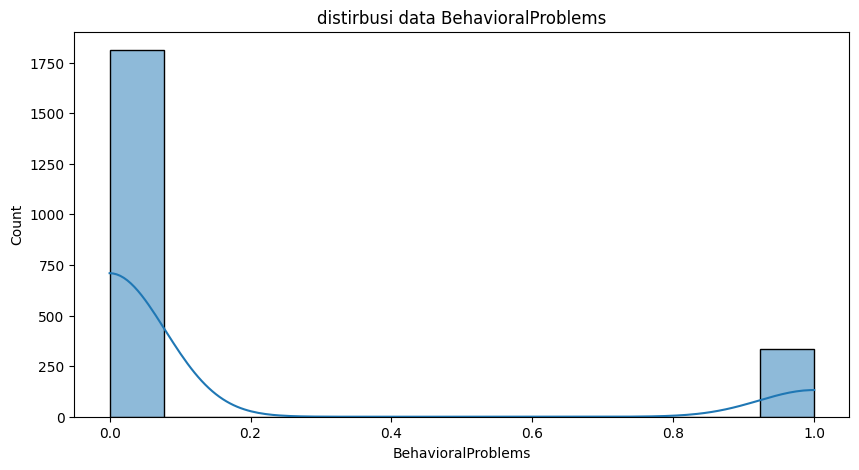

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


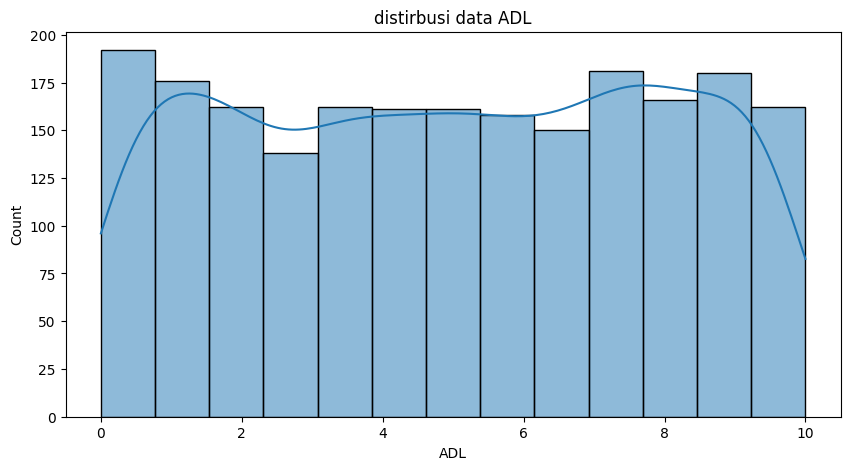

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


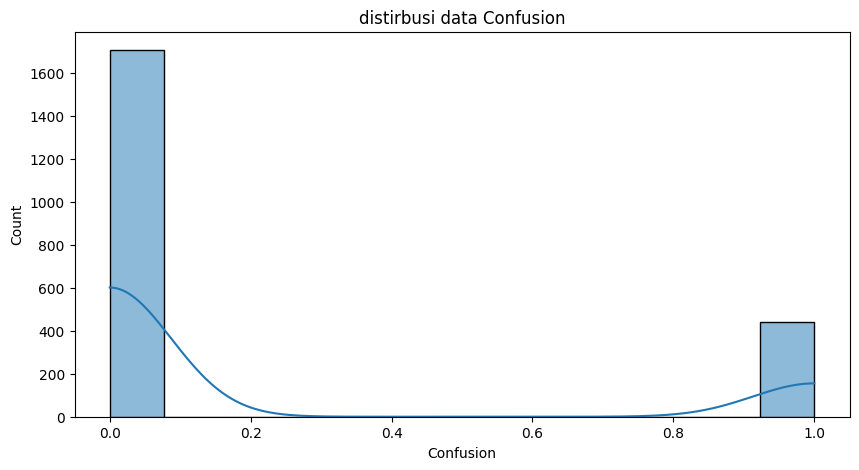

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


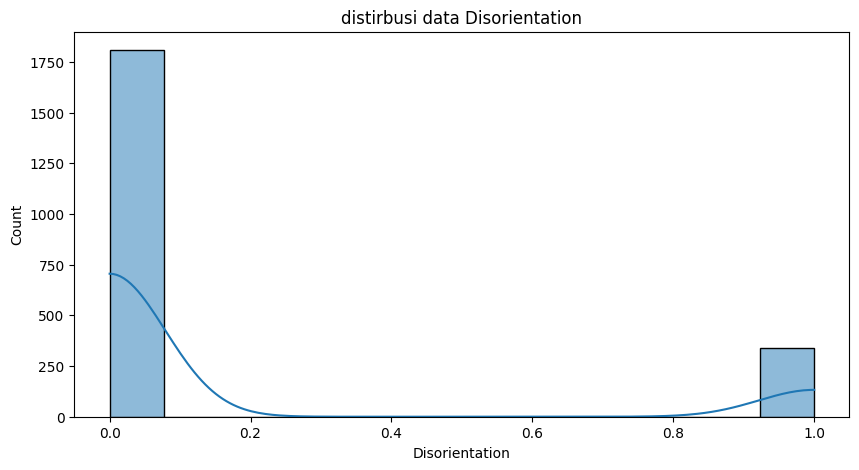

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


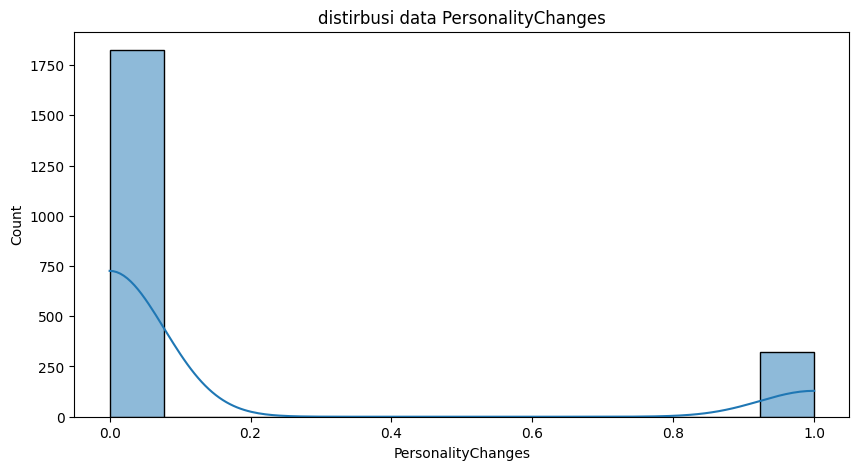

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


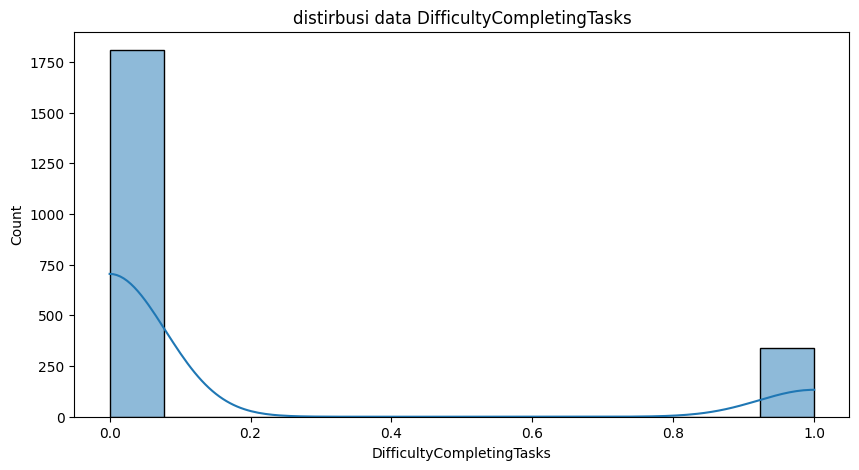

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


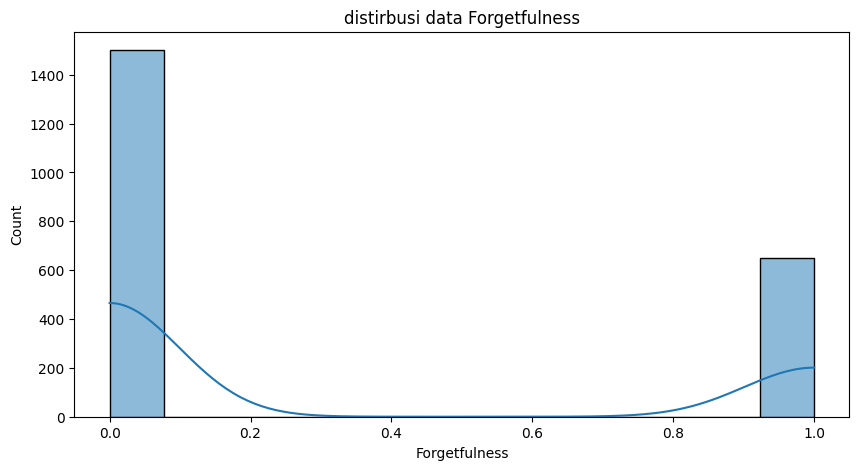

<ipython-input-9-2e9f735d5404>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set1',kde=True)


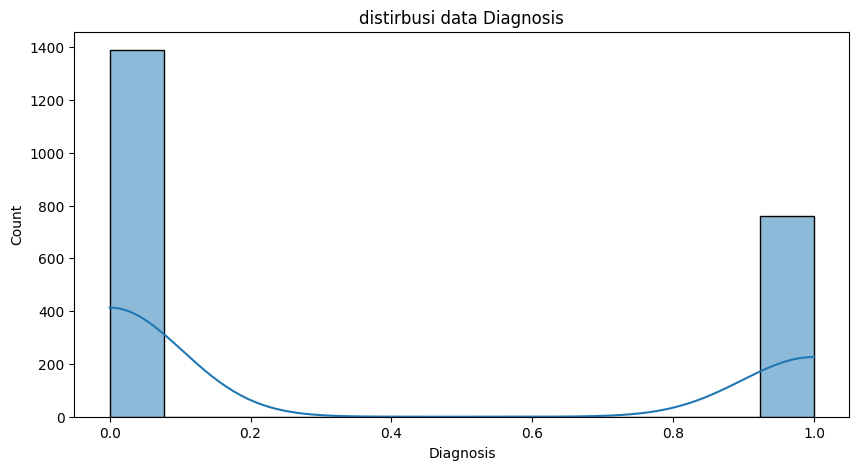

In [9]:
for col in df.columns:
  plt.figure(figsize=(10,5))
  sns.histplot(data=df,x=col,palette='Set1',kde=True)
  plt.xlabel(col)
  plt.title(f"distirbusi data {col}")
  plt.show()

melihat distribusi tiap kolom data yang ada

## Multivariate Analysis

Text(0.5, 1.0, 'korelasi antar variabel')

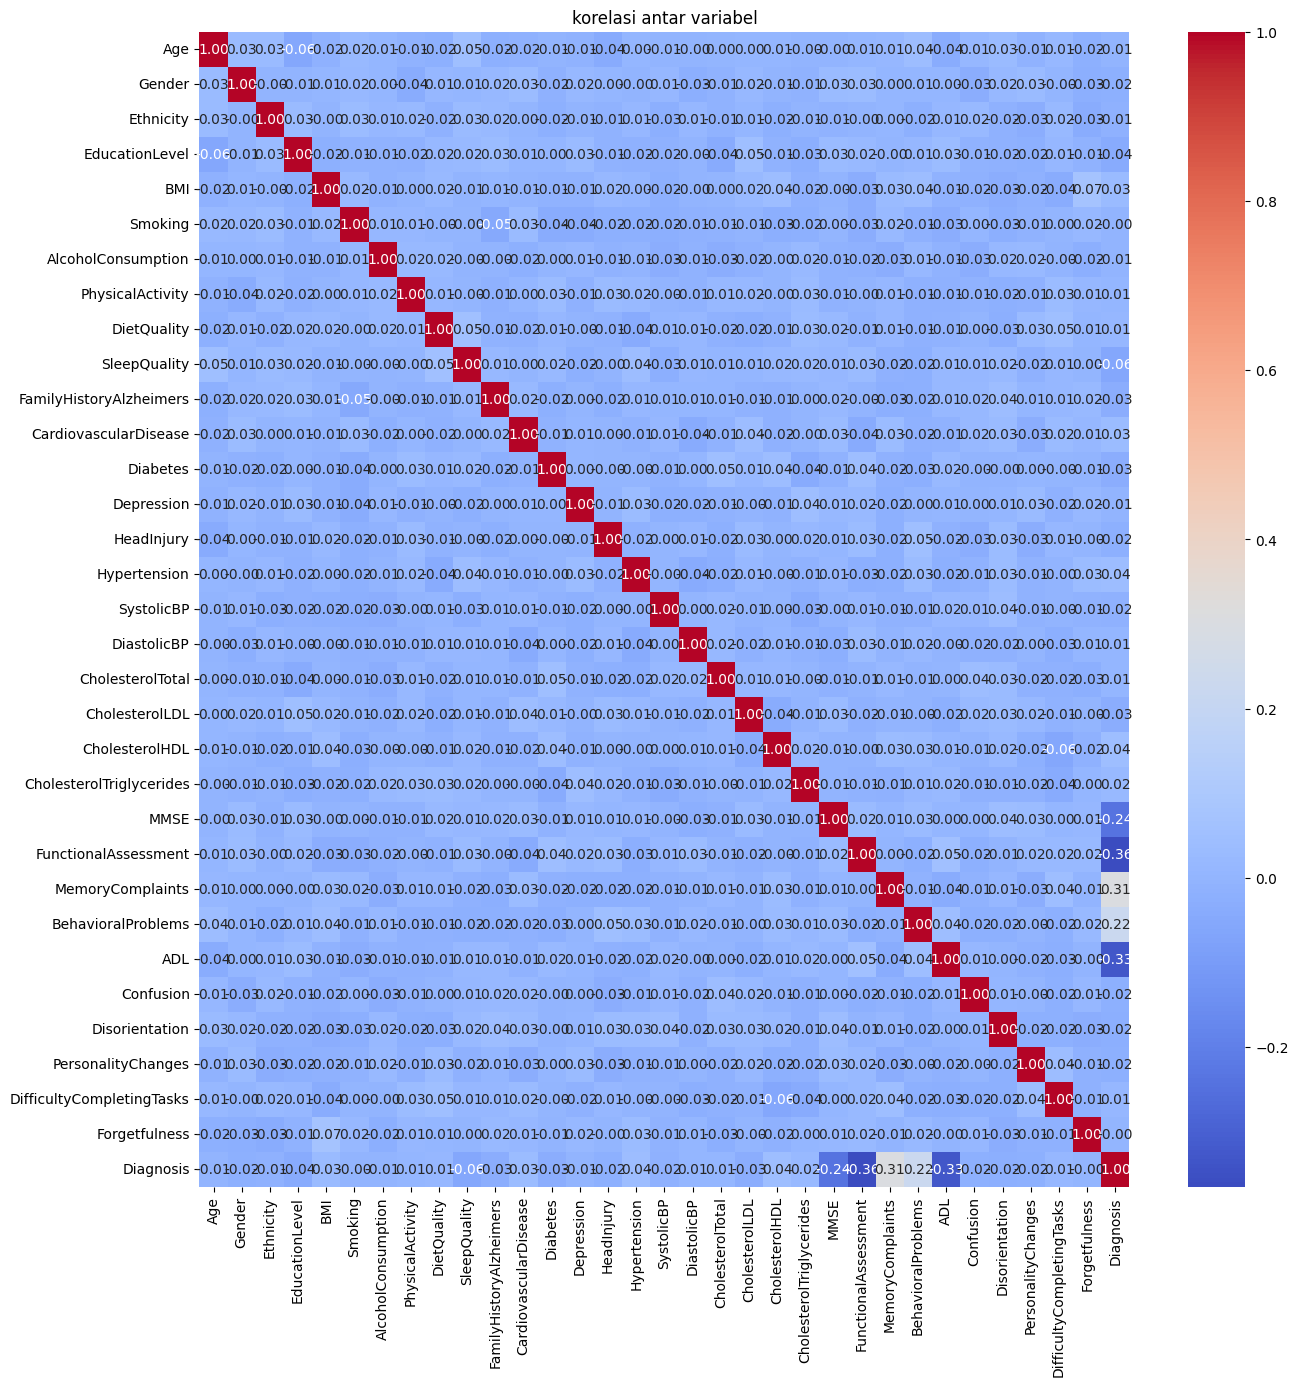

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("korelasi antar variabel")

kode diatas untuk mengetahui relasi yang terjadi antar kolom dan insight yang kita dapat.

**insight:**
- Gejala kognitif dan perilaku saling berkaitan, misalnya:
 - Forgetfulness, Confusion, MemoryComplaints, dan Disorientation → saling menguatkan.

- Kemampuan fungsional (ADL dan FunctionalAssessment) menunjukkan korelasi tinggi satu sama lain, dan negatif terhadap gangguan perilaku.

- Variabel klinis seperti tekanan darah, kolesterol, dan BMI tidak menunjukkan korelasi kuat dengan variabel lain.

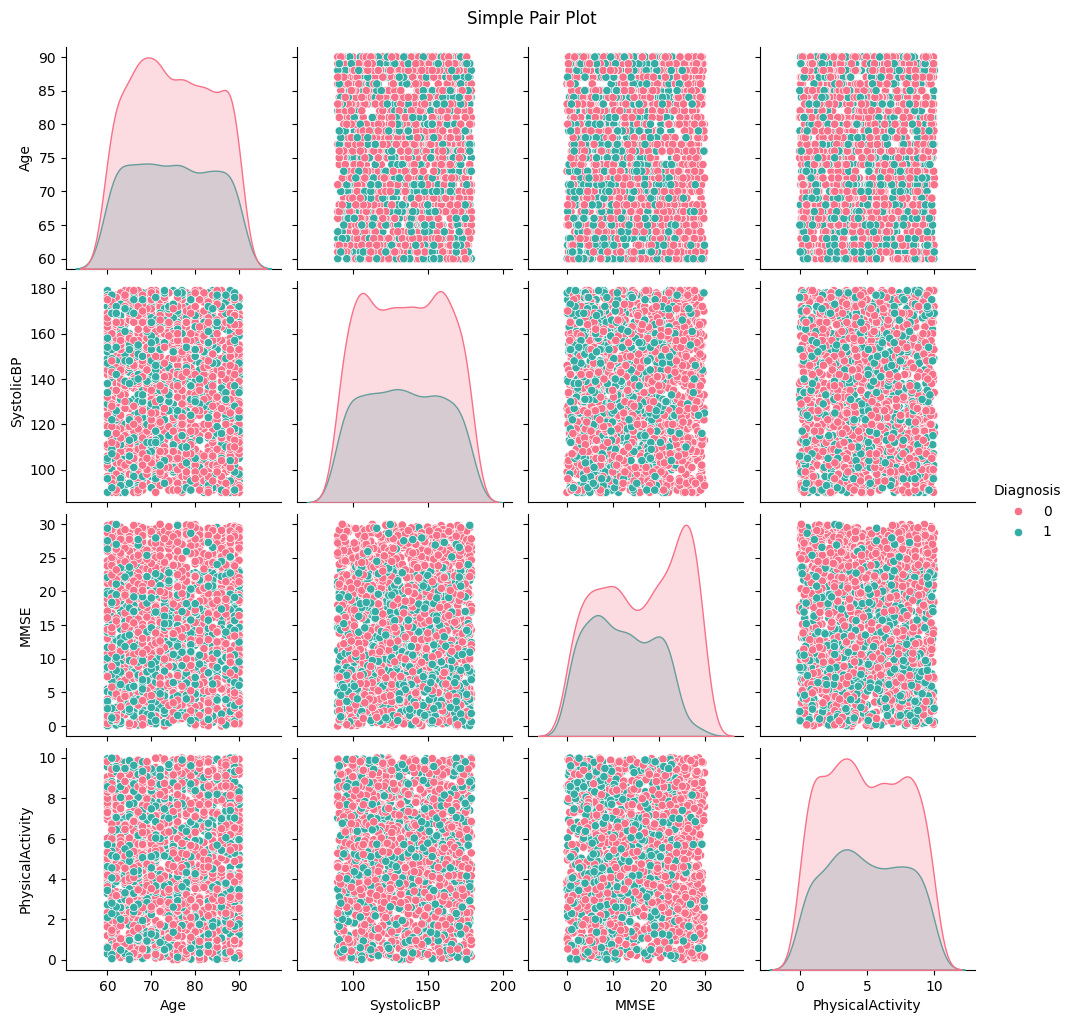

In [11]:
features = df[['Age', 'SystolicBP', 'MMSE', 'PhysicalActivity', 'Diagnosis']]
sns.pairplot(features, hue='Diagnosis' , palette='husl')
plt.suptitle('Simple Pair Plot', y=1.02)
plt.show()

- Tidak ada hubungan linier yang jelas antara pasangan variabel (contohnya Age vs MMSE, SystolicBP vs MMSE).

- Namun, dari distribusi MMSE dan Age, kombinasi kedua variabel ini mungkin berguna dalam model prediktif, terutama jika digunakan dalam model non-linier

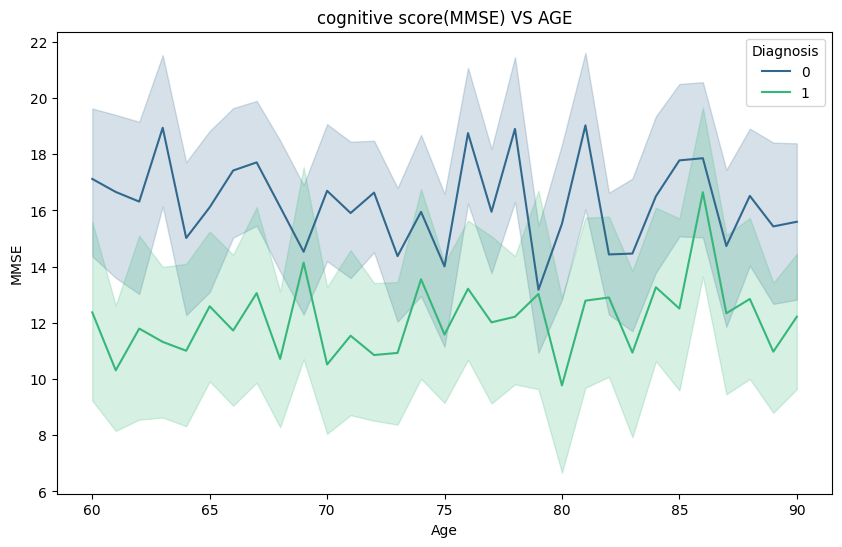

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='Age',y='MMSE',hue='Diagnosis',palette='viridis')
plt.title("cognitive score(MMSE) VS AGE")

plt.xlabel('Age')
plt.ylabel('MMSE')
plt.show()

**Insight Utama:**
1. Perbedaan Skor MMSE antara Diagnosis 0 dan 1:

 - Pasien dengan Diagnosis = 0 (kemungkinan besar sehat atau non-demensia) memiliki skor MMSE yang konsisten lebih tinggi dibandingkan dengan pasien Diagnosis = 1 (kemungkinan besar menderita demensia atau gangguan kognitif).

 - Ini menunjukkan bahwa kondisi kognitif memang cenderung menurun pada individu yang didiagnosis dengan gangguan kognitif.

2. Variabilitas Skor:

 - Kedua kelompok menunjukkan **fluktuasi skor MMSE** seiring bertambahnya usia, **namun kelompok dengan Diagnosis = 1 menunjukkan variabilitas yang lebih besar**, menandakan ketidakkonsistenan dalam penurunan kognitif, yang bisa disebabkan oleh berbagai faktor klinis.

3. Tren Umum terhadap Usia:

 - Tidak terlihat tren penurunan yang sangat jelas terhadap usia dalam kelompok tertentu, tapi tetap terlihat bahwa pada usia yang sama, kelompok Diagnosis 1 memiliki skor MMSE yang lebih rendah secara konsisten.

<ipython-input-13-5c9aa84a4164>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='FamilyHistoryAlzheimers',palette='Set1')


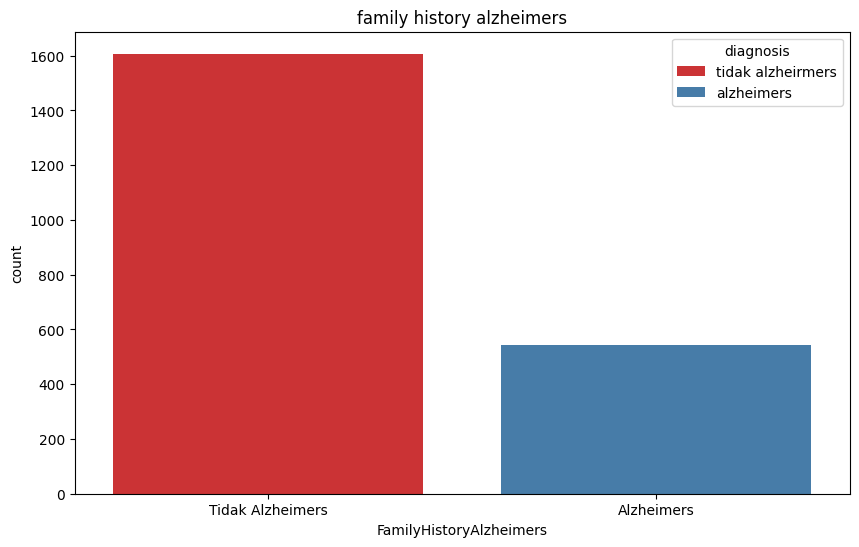

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='FamilyHistoryAlzheimers',palette='Set1')
plt.title("family history alzheimers")
plt.xticks([0,1],["Tidak Alzheimers",'Alzheimers'])
plt.legend(title='diagnosis',labels=['tidak alzheirmers','alzheimers'])
plt.show()

**1. Mayoritas Pasien Tidak Memiliki Riwayat Keluarga Alzheimer:**

 - Terlihat bahwa jumlah pasien yang tidak memiliki riwayat keluarga Alzheimer jauh lebih banyak (1600) dibandingkan dengan pasien yang memiliki riwayat keluarga Alzheimer (550).

 - Ini menunjukkan bahwa populasi data didominasi oleh individu tanpa riwayat keluarga Alzheimer.

**2. Potensi Hubungan antara Riwayat Keluarga dan Diagnosis Alzheimer:**

 - Meskipun grafik ini tidak langsung membagi berdasarkan diagnosis, tapi adanya riwayat keluarga Alzheimer tetap merupakan faktor risiko yang penting secara klinis.

 - Insight ini bisa diperkuat jika kamu memecahnya berdasarkan Diagnosis, misalnya dengan hue='Diagnosis', sehingga bisa dilihat berapa banyak pasien Alzheimer yang memiliki riwayat keluarga.

# Split data

In [14]:
X=df.drop("Diagnosis",axis=1)
y=df['Diagnosis']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("jumlah data pada test:",X_train.shape[0])
print("jumlah data pada test:",X_test.shape[0])


jumlah data pada test: 1719
jumlah data pada test: 430


kode tersebut dilakukan split data yang dimana data train itu sebesar 80% dan data test itu sebesar 20% dengan jumlah data train dan data test tertera diatas

# scaling data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

kode tersebut melakukan scaling data dengan menggunakan teknik standarisasi scala

# model development

In [16]:
# model svm
svm=SVC(C=1.0,kernel='linear',gamma=10)
svm.fit(X_train,y_train)
y_pred_svc=svm.predict(X_test)
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       277
           1       0.78      0.70      0.74       153

    accuracy                           0.82       430
   macro avg       0.81      0.79      0.80       430
weighted avg       0.82      0.82      0.82       430



**Insight Kinerja Model:**

📌 **1. Akurasi Total Model**

**Accuracy:** 0.82 → artinya, secara keseluruhan model berhasil mengklasifikasikan dengan benar 82% dari data uji.

📌 **2. Kinerja per Kelas**

**Kelas 0 (label: 0):**

- Precision: 0.84 → 84% prediksi kelas 0 benar.

- Recall: 0.89 → dari semua yang sebenarnya kelas 0, 89% berhasil dikenali.

- F1-score: 0.86 → gabungan harmonik precision dan recall menunjukkan kinerja sangat baik untuk kelas 0.

**Kelas 1 (label: 1):**

- Precision: 0.78 → dari seluruh prediksi kelas 1, 78% benar.

- Recall: 0.70 → hanya 70% dari kelas 1 yang benar-benar dikenali → relatif rendah.

- F1-score: 0.74 → kinerja lebih rendah dibanding kelas 0.

In [17]:
# model randomforest
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.96      0.82      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.90      0.92       430
weighted avg       0.93      0.93      0.92       430



**Insight Kinerja Model:**

📌 **1. Akurasi Total Model**

**Accuracy:** 0.93 → artinya, secara keseluruhan model berhasil mengklasifikasikan dengan benar 93% dari data uji.

📌 **2. Kinerja per Kelas**

**Kelas 0 (label: 0):**

- Precision: 0.91 → 91% prediksi kelas 0 benar.

- Recall: 0.98 → dari semua yang sebenarnya kelas 0, 98% berhasil dikenali.

- F1-score: 0.94 → gabungan harmonik precision dan recall menunjukkan kinerja sangat baik untuk kelas 0.

**Kelas 1 (label: 1):**

- Precision: 0.96 → dari seluruh prediksi kelas 1, 96% benar.

- Recall: 0.82 → hanya 82% dari kelas 1 yang benar-benar dikenali → relatif rendah.

- F1-score: 0.89 → kinerja lebih rendah dibanding kelas 0.

In [18]:
# model xgboost
xgb=XGBClassifier(use_label_encoder=False,eval_metrics="logloss")
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Akurasi Total Model**

**Accuracy:** 0.95 → artinya, secara keseluruhan model berhasil mengklasifikasikan dengan benar 95% dari data uji.

📌 **Kelas 0 (kemungkinan "tidak Alzheimer")**

- Precision: 0.94 → 94% dari prediksi kelas 0 benar.

- Recall: 0.98 → 98% dari kelas 0 berhasil dikenali.

- F1-score: 0.96 → kombinasi sangat baik antara precision dan recall.

📌 **Kelas 1 (kemungkinan "Alzheimer")**

- Precision: 0.96 → sangat tinggi, model jarang salah mengklasifikasikan kelas 1.

- Recall: 0.90 → 90% dari semua yang benar-benar kelas 1 berhasil dikenali

- F1-score: 0.93 → performa sangat baik dan seimbang.

In [19]:
# menggunakan neural_network
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(100,50,50),max_iter=1000,activation='relu',solver='adam',learning_rate_init=0.001,batch_size=50,alpha=0.0001)
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_test)
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       277
           1       0.75      0.69      0.72       153

    accuracy                           0.81       430
   macro avg       0.79      0.78      0.79       430
weighted avg       0.80      0.81      0.81       430



**Insight Kinerja Model:**

📌 **1. Akurasi Total Model**

**Accuracy:** 0.81 → artinya, secara keseluruhan model berhasil mengklasifikasikan dengan benar 81% dari data uji.

📌 **2. Kinerja per Kelas**

**Kelas 0 (label: 0):**

- Precision: 0.84 → 84% prediksi kelas 0 benar.

- Recall: 0.87 → dari semua yang sebenarnya kelas 0, 87% berhasil dikenali.

- F1-score: 0.85 → gabungan harmonik precision dan recall menunjukkan kinerja sangat baik untuk kelas 0.

**Kelas 1 (label: 1):**

- Precision: 0.75 → dari seluruh prediksi kelas 1, 75% benar.

- Recall: 0.69 → hanya 69% dari kelas 1 yang benar-benar dikenali → relatif rendah.

- F1-score: 0.72 → kinerja lebih rendah dibanding kelas 0.

# evaluasi model

## SVC

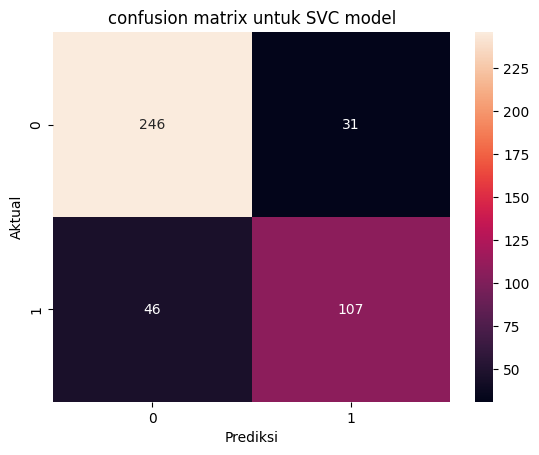

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc),annot=True,fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("confusion matrix untuk SVC model")
plt.show()

**Insight:**
- True Negative (246) dan True Positive (107) menunjukkan model mampu mengklasifikasikan banyak data dengan benar.
- False Negative (46) cukup tinggi → model gagal mengenali 46 orang yang seharusnya masuk kategori positif (misalnya, Alzheimer).
- False Positive (31) berarti 31 orang yang sebenarnya sehat diprediksi sebagai sakit, yang bisa menimbulkan kecemasan dan pengujian tambahan yang tidak perlu.

In [21]:
# mengecek apakah datanya overfitting
print("akurasi pada data y_train:",accuracy_score(y_train,svm.predict(X_train)))
print("akurasi pada data y_test:",accuracy_score(y_test,y_pred_svc))

akurasi pada data y_train: 0.8534031413612565
akurasi pada data y_test: 0.8209302325581396


- kode diatas untuk mengetahui apakah terjadi overfitting atau underfitting

## Random Forest

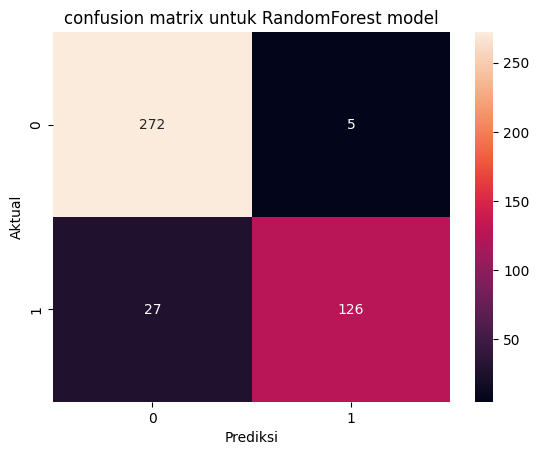

In [22]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("confusion matrix untuk RandomForest model")
plt.show()

- **Total prediksi benar** = 271 (TN) + 134 (TP) = 398 dari 430

- **False Positive** sangat kecil (5 kasus) → hampir semua pasien sehat diprediksi dengan benar.

- **False Negative** juga rendah (27 kasus) → model cukup sensitif dalam mendeteksi pasien yang benar-benar positif (misalnya Alzheimer).

In [23]:
# mengecak data overfitting
print("akurasi pada data y_train:",accuracy_score(y_train,rf.predict(X_train)))
print("akurasi pada data y_test:",accuracy_score(y_test,y_pred_rf))

akurasi pada data y_train: 1.0
akurasi pada data y_test: 0.9255813953488372


- kode diatas untuk mengetahui apakah terjadi overfitting atau underfitting

## XGBOOST

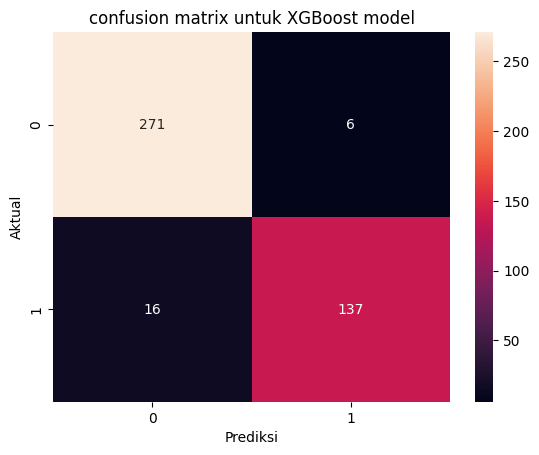

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True,fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("confusion matrix untuk XGBoost model")
plt.show()

- **Total prediksi benar** = 270 (TN) + 137 (TP) = 408 dari 430

- **False Positive** sangat kecil (6 kasus) → hampir semua pasien sehat diprediksi dengan benar.

- **False Negative** juga rendah (16 kasus) → model cukup sensitif dalam mendeteksi pasien yang benar-benar positif (misalnya Alzheimer).

In [25]:
# mengecak data overfitting
print("akurasi pada data y_train:",accuracy_score(y_train,xgb.predict(X_train)))
print("akurasi pada data y_test:",accuracy_score(y_test,y_pred_xgb))

akurasi pada data y_train: 1.0
akurasi pada data y_test: 0.9488372093023256


- kode diatas untuk mengetahui apakah terjadi overfitting atau underfitting

## Multi Layer Perceptron

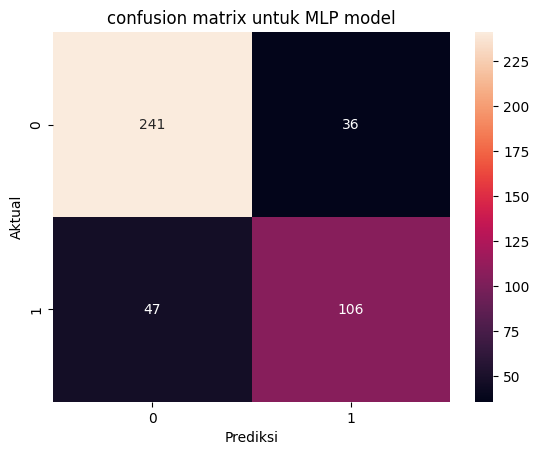

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred_mlp),annot=True,fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("confusion matrix untuk MLP model")
plt.show()

**Insight:**
- True Negative (241) dan True Positive (106) menunjukkan model mampu mengklasifikasikan banyak data dengan benar.
- False Negative (47) cukup tinggi → model gagal mengenali 47 orang yang seharusnya masuk kategori positif (misalnya, Alzheimer).
- False Positive (36) berarti 36 orang yang sebenarnya sehat diprediksi sebagai sakit, yang bisa menimbulkan kecemasan dan pengujian tambahan yang tidak perlu.

# optimasi model

In [27]:
svc_param_grid={
    'C':[1],
    'gamma':[1,0.1],
    'kernel':['linear']
}

# MENGGUNAKAN GRID SEARCH
from sklearn.model_selection import GridSearchCV
grid_svc=GridSearchCV(SVC(),svc_param_grid,refit=True,verbose=1)
grid_svc.fit(X_train,y_train)
print("parameter terbaik adalah:",grid_svc.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
parameter terbaik adalah: SVC(C=1, gamma=1, kernel='linear')


kode diatas untuk melakukan optimasi terhadap model SVC untuk mencari parameter terbaik dengan melakukan grid search

In [28]:
rf_param_grid={
    'min_samples_split':[5,10],
    'max_features':['log2'],
    'bootstrap':[False]
}

# MENGGUNAKAN GRID SEARCH
grid_rf=GridSearchCV(RandomForestClassifier(),rf_param_grid,refit=True,verbose=1)
grid_rf.fit(X_train,y_train)
print("parameter terbaik adalah:",grid_rf.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
parameter terbaik adalah: RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=5)


kode diatas untuk melakukan optimasi terhadap model Random Forest untuk mencari parameter terbaik dengan melakukan grid search

In [29]:
xgboost_param_grid={
    'n_estimators':[200],
    'learning_rate':[0.01],
    'max_depth':[3,5],
    'colsample_bytree':[1.0],
    'gamma':[0]
}

# MENGGUNAKAN GRID SEARCH
grid_xgb=GridSearchCV(XGBClassifier(),xgboost_param_grid,refit=True,verbose=1)
grid_xgb.fit(X_train,y_train)
print("parameter terbaik adalah:",grid_xgb.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
parameter terbaik adalah: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


kode diatas untuk melakukan optimasi terhadap model XGBoost untuk mencari parameter terbaik dengan melakukan grid search

In [30]:
mlp_param_grid={
    'hidden_layer_sizes':[(50,50,50)],
    'learning_rate_init':[0.001,0.01],
    'batch_size':[100],
    'alpha':[0.0]
}
# MENGGUNUNAKAN GRID SEARCH
grid_mlp=GridSearchCV(MLPClassifier(),mlp_param_grid,refit=True,verbose=1)
grid_mlp.fit(X_train,y_train)
print("parameter terbaik adalah:",grid_mlp.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
parameter terbaik adalah: MLPClassifier(alpha=0.0, batch_size=100, hidden_layer_sizes=(50, 50, 50),
              learning_rate_init=0.01)


kode diatas untuk melakukan optimasi terhadap model XGBoost untuk mencari parameter terbaik dengan melakukan grid search

# Evaluasi Model Setelah Melakukan Optimasi

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       277
           1       0.78      0.70      0.74       153

    accuracy                           0.82       430
   macro avg       0.81      0.79      0.80       430
weighted avg       0.82      0.82      0.82       430



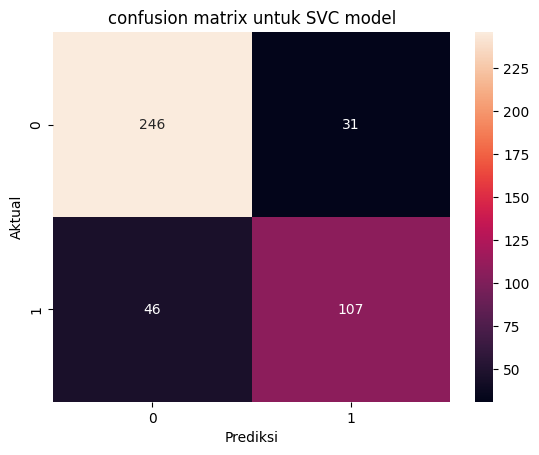

In [31]:
# model svm
svm=SVC(C=1.0,kernel='linear',gamma=1)
svm.fit(X_train,y_train)
y_pred_svc=svm.predict(X_test)
print(classification_report(y_test,y_pred_svc))

sns.heatmap(confusion_matrix(y_test,y_pred_svc),annot=True,fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("confusion matrix untuk SVC model")
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       277
           1       0.96      0.88      0.91       153

    accuracy                           0.94       430
   macro avg       0.95      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



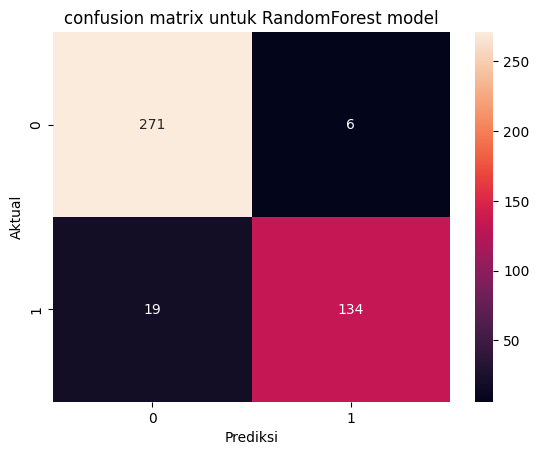

In [32]:
# model randomforest
rf=RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=10,random_state=42)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("confusion matrix untuk RandomForest model")
plt.show()



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.95      0.92      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



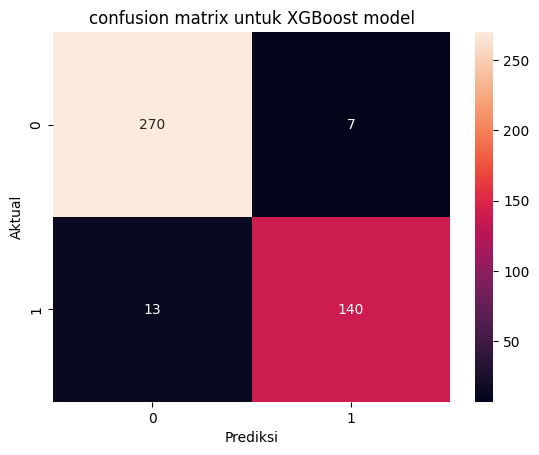

In [33]:
# Model XGBOOST
xgb=XGBClassifier(colsample_bytree=1.0,gamma=0,learning_rate=0.01,max_depth=5,n_estimators=200,use_label_encoder=False,eval_metrics="logloss")
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True,fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("confusion matrix untuk XGBoost model")
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       277
           1       0.74      0.69      0.72       153

    accuracy                           0.80       430
   macro avg       0.79      0.78      0.78       430
weighted avg       0.80      0.80      0.80       430



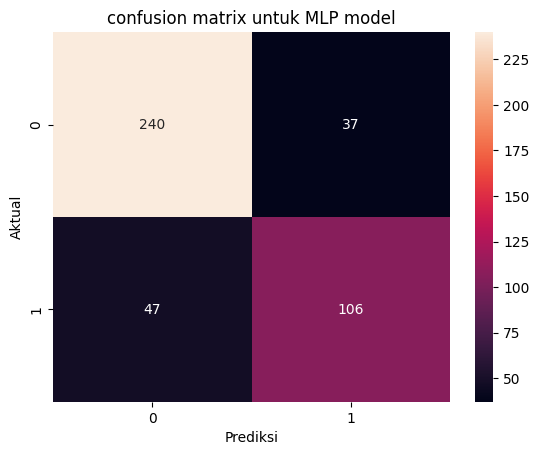

In [34]:
# menggunakan neural_network
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=600,activation='relu',solver='adam',learning_rate_init=0.01,batch_size=100,alpha=0.0)
mlp.fit(X_train,y_train)
y_pred_mlp=mlp.predict(X_test)
print(classification_report(y_test,y_pred_mlp))

sns.heatmap(confusion_matrix(y_test,y_pred_mlp),annot=True,fmt="d")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("confusion matrix untuk MLP model")
plt.show()

# Insight:
setiap optimasi yang dilakukan untuk setiap-setiap model tidak ada perubahan yang akurasi signifikan yang terjadi baik itu SVC,RandomForestClassifier,XGBOOST,dan MLPClassifier itu tidak ada perubahan baik sebelum optimasi dan setelah optimasi

# Tabel Perbandingan

In [39]:
# membuat tabel perbandingan menggunakan pandas
from sklearn.metrics import f1_score
tabel_perbandingan=pd.DataFrame({
    "model":["SVC","RandomForest","XGBoost","MLP"],
    "akurasi":[accuracy_score(y_test,y_pred_svc),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_xgb),accuracy_score(y_test,y_pred_mlp)],
    "precision":[precision_score(y_test,y_pred_svc),precision_score(y_test,y_pred_rf),precision_score(y_test,y_pred_xgb),precision_score(y_test,y_pred_mlp)],
    "recall":[recall_score(y_test,y_pred_svc),recall_score(y_test,y_pred_rf),recall_score(y_test,y_pred_xgb),recall_score(y_test,y_pred_mlp)],
    "f1-score":[f1_score(y_test,y_pred_svc),f1_score(y_test,y_pred_rf),f1_score(y_test,y_pred_xgb),f1_score(y_test,y_pred_mlp)]
})

tabel_perbandingan

,model,akurasi,precision,recall,f1-score
0,SVC,0.820930,0.775362,0.699346,0.735395
1,RandomForest,0.941860,0.957143,0.875817,0.914676
2,XGBoost,0.953488,0.952381,0.915033,0.933333
3,MLP,0.804651,0.741259,0.692810,0.716216


📌 **Perbandingan Model:**
1. **XGBoost:**

- Memiliki skor tertinggi hampir di semua metrik:

 - Akurasi: 95.35%

 - Precision: 95.24%

 - Recall: 91.50%

 - F1-score: 93.33%

**Kesimpulan**: XGBoost adalah model dengan performa terbaik secara keseluruhan.

2. **RandomForest:**

- Performa sangat baik juga, meskipun sedikit di bawah XGBoost:

 - Akurasi: 94.19%

 - Precision: 95.71% (bahkan lebih tinggi dari XGBoost)

 - Recall: 87.58%

 - F1-score: 91.47%

**Kesimpulan:** Sangat baik, terutama jika ingin memaksimalkan precision.

3. **SVC (Support Vector Classifier):**

 - Performa sedang:

 - Akurasi: 82.09%

 - F1-score: 73.54%

 - Precision dan recall relatif seimbang, namun lebih rendah dari RandomForest dan XGBoost.

**Kesimpulan:** Layak, tapi kalah jauh dari dua model di atas.

4. **MLP (Multilayer Perceptron):**

- Performa terendah di semua metrik:

 - Akurasi: 80.47%

 - Precision: 74.13%

 - Recall: 69.28%

 - F1-score: 71.62%

**Kesimpulan:** MLP kurang efektif untuk kasus ini dibanding model lainnya.